# **Case Study - Analisis NYC 311 Service Requests**

311 Service Requests adalah permintaan yang dibuat oleh penduduk untuk layanan kota seperti keluhan kebisingan, atau masalah dengan air dan utilitas. Setiap permintaan dicatat bersama dengan beberapa informasi terkait seperti jenis permintaan dan di kota mana permintaan tersebut berasal.

Kumpulan data lengkap diperbarui setiap hari dan dapat diakses di [[NYC Open Data Wesbite](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9).]

Study Case Event hari ini hanya akan membahas sebagian kecil data di bulan April 2018. Kita akan coba untuk mencari tau, bagian kota mana yang paling sering komplain pada hari Minggu?



# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Baca Data**

Gunakan fungsi Pandas **read_csv()** , dan kenali bagaimana struktur atau bentuk datanya dengan menggunakan fungsi **head()**, **tail()**, **info()**, **describe()**, **shape()** 

In [3]:
df =  pd.read_csv('311_Service_Requests_APRIL2018.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38837194,04/01/2018 12:00:00 AM,04/10/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Swimming Pool - Unmaintained,1-2 Family Dwelling,10312.0,45 JEANETTE AVENUE,JEANETTE AVENUE,ANNADALE ROAD,RALPH AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,05/01/2018 07:02:38 PM,The Department of Health and Mental Hygiene wi...,04/10/2018 12:00:00 AM,03 STATEN ISLAND,5.062210e+09,STATEN ISLAND,"935,441","137,203",PHONE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.543132,-74.175614,"(40.54313178878882, -74.17561421997694)"
1,38837043,04/01/2018 12:00:00 AM,03/12/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,11217.0,399 ATLANTIC AVENUE,ATLANTIC AVENUE,NaN,NaN,NaN,NaN,LATLONG,BROOKLYN,NaN,NaN,Pending,05/01/2018 10:59:08 AM,The Department of Health and Mental Hygiene wi...,04/01/2018 11:02:27 AM,02 BROOKLYN,NaN,BROOKLYN,"988,460","189,634",MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687177,-73.984820,"(40.687177293988285, -73.98481975668435)"
2,38836824,04/01/2018 12:00:00 AM,04/09/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11224.0,2980 WEST 29 STREET,WEST 29 STREET,MERMAID AVENUE,SURF AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,05/01/2018 10:15:54 AM,The Department of Health and Mental Hygiene wi...,04/09/2018 12:00:00 AM,13 BROOKLYN,3.070510e+09,BROOKLYN,"985,592","148,491",PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.574249,-73.995169,"(40.57424936932171, -73.99516925322999)"
3,38836823,04/01/2018 12:00:00 AM,03/20/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10025.0,360 CENTRAL PARK WEST,CENTRAL PARK WEST,WEST 95 STREET,WEST 96 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Pending,05/01/2018 08:06:26 PM,The Department of Health and Mental Hygiene wi...,04/01/2018 08:09:23 PM,07 MANHATTAN,1.012098e+09,MANHATTAN,"994,006","227,668",ONLINE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.791567,-73.964767,"(40.79156678627206, -73.9647670611818)"
4,38836788,04/01/2018 12:00:00 AM,04/04/2018 06:19:08 PM,DOHMH,Department of Health and Mental Hygiene,Unsanitary Animal Pvt Property,Dog,3+ Family Apartment Building,10454.0,590 EAST 138 STREET,EAST 138 STREET,ST ANNS AVENUE,CYPRESS AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,05/01/2018 03:10:20 PM,The Department of Health and Mental Hygiene wi...,04/04/2018 06:19:08 PM,01 BRONX,2.025500e+09,BRONX,"1,007,381","233,073",ONLINE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.806377,-73.916446,"(40.806377143967396, -73.91644582317069)"


In [5]:
df.tail(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
18357,38849339,04/03/2018 10:21:17 PM,04/04/2018 02:16:36 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10019.0,778 9 AVENUE,9 AVENUE,WEST 51 STREET,WEST 52 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,04/04/2018 06:21:17 AM,The Police Department responded to the complai...,04/04/2018 02:16:37 AM,04 MANHATTAN,1.010420e+09,MANHATTAN,"987,539","217,838",MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.764591,-73.988127,"(40.764590802150515, -73.98812687601041)"
18358,38845003,04/03/2018 10:21:58 PM,04/04/2018 05:53:11 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10467.0,844 EAST 221 STREET,EAST 221 STREET,BARNES AVENUE,BRONXWOOD AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,04/04/2018 06:21:58 AM,The Police Department responded and upon arriv...,04/04/2018 05:53:11 AM,12 BRONX,2.046790e+09,BRONX,"1,023,625","261,217",PHONE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.883567,-73.857604,"(40.88356659658488, -73.8576038026292)"
18359,38848606,04/03/2018 10:22:01 PM,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11694.0,118-07 ROCKAWAY BEACH BOULEVARD,ROCKAWAY BEACH BOULEVARD,BEACH 118 STREET,BEACH 119 STREET,NaN,NaN,ADDRESS,ROCKAWAY PARK,NaN,NaN,Open,03/23/2020 10:22:01 PM,The Department of Parks and Recreation will re...,NaN,14 QUEENS,4.162280e+09,QUEENS,"1,028,950","150,327",OTHER,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.579176,-73.839083,"(40.57917623613607, -73.83908313648944)"
18360,38851228,04/03/2018 10:22:13 PM,04/03/2018 10:53:52 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10033.0,612 WEST 178 STREET,WEST 178 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,04/04/2018 06:22:13 AM,The Police Department responded to the complai...,04/03/2018 10:53:52 PM,12 MANHATTAN,1.021440e+09,MANHATTAN,"1,002,054","248,068",PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.847546,-73.935648,"(40.84754647226867, -73.93564830036111)"
18361,38851563,04/03/2018 10:22:44 PM,04/04/2018 02:24:41 AM,NYPD,New York City Police Department,Noise - Residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18362 entries, 0 to 18361
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      18362 non-null  int64  
 1   Created Date                    18362 non-null  object 
 2   Closed Date                     17569 non-null  object 
 3   Agency                          18362 non-null  object 
 4   Agency Name                     18362 non-null  object 
 5   Complaint Type                  18362 non-null  object 
 6   Descriptor                      18169 non-null  object 
 7   Location Type                   14695 non-null  object 
 8   Incident Zip                    17668 non-null  float64
 9   Incident Address                15475 non-null  object 
 10  Street Name                     15475 non-null  object 
 11  Cross Street 1                  10083 non-null  object 
 12  Cross Street 2                  

In [9]:
df.shape

(18362, 41)

# **Investigasi Data**

Kolom dataset yang akan kita gunakan untuk analisa data meliputi :


1.   Created Date, untuk menentukan hari suatu pengajuan di ajukan
2.   Borough, untuk menentukan dari bagian kota mana keluhan tersebut berasal

1.   Complaint Type, untuk menentukan kategori keluhan

Disini kita akan menggunakan fungsi **unique() dan value_counts()** berguna untuk menyelidiki kolom dengan nilai string atau tanggal, serta bisa gunakan fungsi **describe** untuk menyelidiki kolom dengan nilai numerik dan memeriksa data outlier





In [12]:
df['Complaint Type'].value_counts()[:25]

HEAT/HOT WATER                         1940
Noise - Residential                    1779
Request Large Bulky Item Collection    1199
Blocked Driveway                        966
Illegal Parking                         936
Street Condition                        835
Street Light Condition                  681
UNSANITARY CONDITION                    555
PAINT/PLASTER                           421
Noise                                   413
Sewer                                   344
PLUMBING                                335
Water System                            323
Missed Collection (All Materials)       307
Sanitation Condition                    302
Noise - Commercial                      296
Derelict Vehicles                       273
WATER LEAK                              268
Noise - Street/Sidewalk                 261
Dirty Conditions                        255
Sidewalk Condition                      249
DOOR/WINDOW                             249
Derelict Vehicle                

In [13]:
df['Borough'].value_counts()

BROOKLYN         5703
QUEENS           4706
MANHATTAN        3441
BRONX            3171
STATEN ISLAND    1034
Unspecified       306
Name: Borough, dtype: int64

In [6]:
df.describe()

,Unique Key,Incident Zip,BBL,Vehicle Type,Latitude,Longitude
count,1.836200e+04,17668.000000,1.491400e+04,0.0,17176.000000,17176.000000
mean,3.884290e+07,10849.432986,2.823129e+09,NaN,40.727381,-73.923060
std,6.892413e+03,678.854913,1.178018e+09,NaN,0.086322,0.085848
min,3.882586e+07,0.000000,1.000058e+09,NaN,40.500568,-74.252116
25%,3.883708e+07,10451.000000,2.029600e+09,NaN,40.663504,-73.966220
50%,3.884290e+07,11207.000000,3.032470e+09,NaN,40.718457,-73.925237
75%,3.884856e+07,11237.000000,4.017455e+09,NaN,40.799599,-73.873127
max,3.892277e+07,60179.000000,5.080480e+09,NaN,40.912468,-73.701496


Dari pengecekan singkat diatas, dapat diketahui :

1. Ada banyak jenis keluhan berbeda yang terkait dengan kebisingan seperti 'Noise - Residential', 'Noise', dll.
2. Perlu dilakukan pengelompokkan terkait jenis komplain yang ada untuk mendapatkan gambaran yang akurat tentang jumlah keseluruhan keluhan kebisingan
3. Ada beberapa keluhan yang dicatat ke wilayah 'Unspecified', tetapi jumlah total catatan rendah (~ 4.000 dari total ~ 200.000). Karena nantinya akan dikelompokkan berdasarkan wilayah data Unspecified ini tetap akan disimpan
4. Tipe data 'Created Date' saat ini adalah objek string, yang harus diubah menjadi objek datetime untuk memungkinkan kita memfilter dengan mudah pada hari apa pun dalam seminggu, bulan, dll.


Jadi yang perlu dilakukan yaitu :

Tentukan ulang tipe data 'Tanggal Dibuat' untuk memfilter hari dalam seminggu (kita akan mencoba cek keluhan apa yang paling populer pada hari Minggu).

Tambahkan kolom baru 'is_noise' berdasarkan 'Complaint Type' untuk menangkap keluhan terkait kebisingan serupa.


# Lakukan Pembersihan Data

1. Tentukan ulang jenis data 'Created Date' untuk memfilter hari dalam seminggu (keluhan apa yang paling populer pada hari Minggu) menggunakan fungsi **to_datetime()**

In [14]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18362 entries, 0 to 18361
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unique Key                      18362 non-null  int64         
 1   Created Date                    18362 non-null  datetime64[ns]
 2   Closed Date                     17569 non-null  object        
 3   Agency                          18362 non-null  object        
 4   Agency Name                     18362 non-null  object        
 5   Complaint Type                  18362 non-null  object        
 6   Descriptor                      18169 non-null  object        
 7   Location Type                   14695 non-null  object        
 8   Incident Zip                    17668 non-null  float64       
 9   Incident Address                15475 non-null  object        
 10  Street Name                     15475 non-null  object        
 11  Cr

2. Tambahkan kolom baru 'is_noise' berdasarkan 'Complaint Type' untuk menangkap keluhan terkait kebisingan serupa seperti 'Noise' dan 'Noise - Residential' dengan menggunakan fungsi str.contains

In [18]:
df['is_noise'] = df['Complaint Type'].str.contains('Noise')

df['is_noise']

0        False
1        False
2        False
3        False
4        False
         ...  
18357     True
18358    False
18359    False
18360     True
18361     True
Name: is_noise, Length: 18362, dtype: bool

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18362 entries, 0 to 18361
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unique Key                      18362 non-null  int64         
 1   Created Date                    18362 non-null  datetime64[ns]
 2   Closed Date                     17569 non-null  object        
 3   Agency                          18362 non-null  object        
 4   Agency Name                     18362 non-null  object        
 5   Complaint Type                  18362 non-null  object        
 6   Descriptor                      18169 non-null  object        
 7   Location Type                   14695 non-null  object        
 8   Incident Zip                    17668 non-null  float64       
 9   Incident Address                15475 non-null  object        
 10  Street Name                     15475 non-null  object        
 11  Cr

# Bagian kota mana yang paling sering komplain pada hari Minggu?

Solusi :
1. Filter keluhan kebisingan menggunakan kolom baru 'is_noise'
2. Filter hari-hari dalam seminggu menggunakan kolom 'Created Date' dan gunakan fungsi dt.dayofweek untuk mengembalikan angka yang berbeda untuk setiap hari dalam seminggu. Minggu adalah nomor 6 sesuai dokumentasi.
3. Kelompokkan data menurut lingkungan menggunakan kolom 'Borough', dan urutkan lingkungan dari yang terbanyak

In [19]:
df[(df['is_noise'] == True) & (df['Created Date'].dt.dayofweek == 6)] \
    .groupby('Borough').count()['Complaint Type'] \
    .sort_values(ascending=False)

Borough
MANHATTAN        391
BROOKLYN         378
BRONX            316
QUEENS           268
STATEN ISLAND     45
Unspecified        1
Name: Complaint Type, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

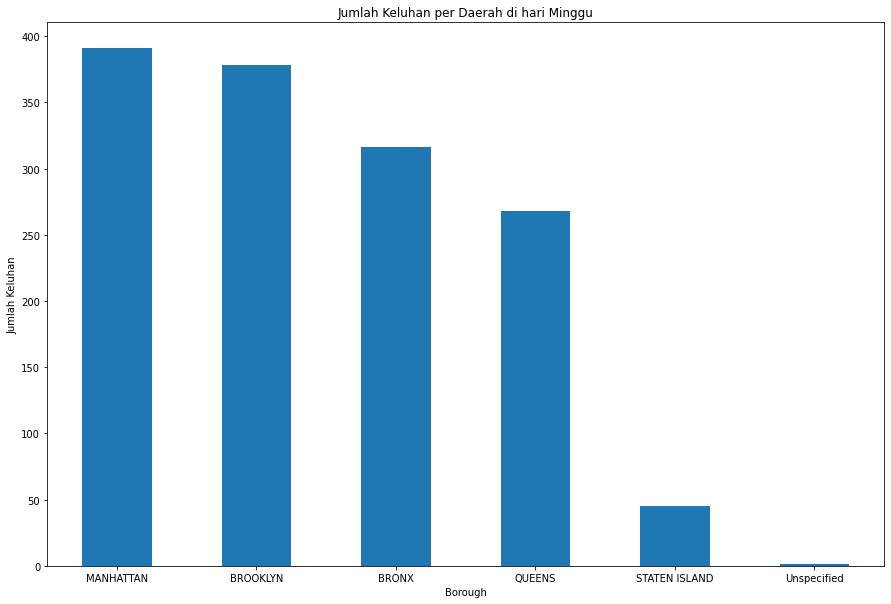

In [20]:
df[(df['is_noise'] == True) & (df['Created Date'].dt.dayofweek == 6)] \
    .groupby('Borough').count()['Complaint Type'] \
    .sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.title('Jumlah Keluhan per Daerah di hari Minggu')
plt.ylabel('Jumlah Keluhan')
plt.xticks(rotation=0)

Eksplorasi Kode Pos

In [21]:
df['Incident Zip'].unique()

array([10312., 11217., 11224., 10025., 10454., 11204., 11226., 11225.,
       10029., 11432., 10014., 11422., 10467., 11416., 10463., 10016.,
       10026., 11356., 10301., 11235., 10037., 11385., 11222., 11207.,
       10040., 10306., 10024., 11236., 11205., 10022., 10468., 10023.,
       11238., 11435., 11213., 10473., 11372., 10010., 10469., 11220.,
       11203., 11419., 10002., 10452., 11234., 10453., 11001., 10032.,
       11378., 11216., 11362., 11368., 10460., 10310., 11211., 11355.,
       10459., 10457., 10465., 10455., 11214., 10456., 11223., 10001.,
       10012., 10003., 10031., 11237., 11426., 11102., 10011., 10305.,
       10018., 10017., 10314., 11232., 11210., 10039., 10033., 11433.,
       11417., 10466., 11106., 10309., 11358., 11360., 11209.,    nan,
       10308., 10475., 11354., 10451., 11208., 11105., 11413., 11229.,
       10458., 10034., 11219., 10028., 11103., 10128., 11429., 11109.,
       11233., 11374., 11375., 11379., 11423., 10027., 11414., 11692.,
      

In [22]:
na_values = ['NO CLUE', 'N/A', '0', '*', 'VARIES']

In [23]:
requests = pd.read_csv('311_Service_Requests_APRIL2018.csv', na_values=na_values, dtype={'Incident Zip': str})

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
requests.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,38837194,04/01/2018 12:00:00 AM,04/10/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Standing Water,Swimming Pool - Unmaintained,1-2 Family Dwelling,10312,45 JEANETTE AVENUE,JEANETTE AVENUE,ANNADALE ROAD,RALPH AVENUE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,05/01/2018 07:02:38 PM,The Department of Health and Mental Hygiene wi...,04/10/2018 12:00:00 AM,03 STATEN ISLAND,5.062210e+09,STATEN ISLAND,"935,441","137,203",PHONE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.543132,-74.175614,"(40.54313178878882, -74.17561421997694)"
1,38837043,04/01/2018 12:00:00 AM,03/12/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,11217,399 ATLANTIC AVENUE,ATLANTIC AVENUE,NaN,NaN,NaN,NaN,LATLONG,BROOKLYN,NaN,NaN,Pending,05/01/2018 10:59:08 AM,The Department of Health and Mental Hygiene wi...,04/01/2018 11:02:27 AM,02 BROOKLYN,NaN,BROOKLYN,"988,460","189,634",MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687177,-73.984820,"(40.687177293988285, -73.98481975668435)"
2,38836824,04/01/2018 12:00:00 AM,04/09/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11224,2980 WEST 29 STREET,WEST 29 STREET,MERMAID AVENUE,SURF AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,05/01/2018 10:15:54 AM,The Department of Health and Mental Hygiene wi...,04/09/2018 12:00:00 AM,13 BROOKLYN,3.070510e+09,BROOKLYN,"985,592","148,491",PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.574249,-73.995169,"(40.57424936932171, -73.99516925322999)"
3,38836823,04/01/2018 12:00:00 AM,03/20/2018 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10025,360 CENTRAL PARK WEST,CENTRAL PARK WEST,WEST 95 STREET,WEST 96 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Pending,05/01/2018 08:06:26 PM,The Department of Health and Mental Hygiene wi...,04/01/2018 08:09:23 PM,07 MANHATTAN,1.012098e+09,MANHATTAN,"994,006","227,668",ONLINE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.791567,-73.964767,"(40.79156678627206, -73.9647670611818)"
4,38836788,04/01/2018 12:00:00 AM,04/04/2018 06:19:08 PM,DOHMH,Department of Health and Mental Hygiene,Unsanitary Animal Pvt Property,Dog,3+ Family Apartment Building,10454,590 EAST 138 STREET,EAST 138 STREET,ST ANNS AVENUE,CYPRESS AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,NaN,Closed,05/01/2018 03:10:20 PM,The Department of Health and Mental Hygiene wi...,04/04/2018 06:19:08 PM,01 BRONX,2.025500e+09,BRONX,"1,007,381","233,073",ONLINE,Unspecified,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.806377,-73.916446,"(40.806377143967396, -73.91644582317069)"


In [24]:
requests['Incident Zip'].unique()

array(['10312', '11217', '11224', '10025', '10454', '11204', '11226',
       '11225', '10029', '11432', '10014', '11422', '10467', '11416',
       '10463', '10016', '10026', '11356', '10301', '11235', '10037',
       '11385', '11222', '11207', '10040', '10306', '10024', '11236',
       '11205', '10022', '10468', '10023', '11238', '11435', '11213',
       '10473', '11372', '10010', '10469', '11220', '11203', '11419',
       '10002', '10452', '11234', '10453', '11001', '10032', '11378',
       '11216', '11362', '11368', '10460', '10310', '11211', '11355',
       '10459', '10457', '10465', '10455', '11214', '10456', '11223',
       '10001', '10012', '10003', '10031', '11237', '11426', '11102',
       '10011', '10305', '10018', '10017', '10314', '11232', '11210',
       '10039', '10033', '11433', '11417', '10466', '11106', '10309',
       '11358', '11360', '11209', nan, '10308', '10475', '11354', '10451',
       '11208', '11105', '11413', '11229', '10458', '10034', '11219',
       '10028',

In [28]:
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
len(requests[rows_with_dashes])

2

In [29]:
requests[rows_with_dashes]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
71027,38913093,04/11/2018 04:09:03 PM,04/27/2018 01:06:07 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Debt Not Owed,NaN,55164-0437,P.O BOX 64437,64437,NaN,NaN,NaN,NaN,NaN,ST PAUL,NaN,NaN,Closed,04/28/2018 02:03:26 PM,The Department of Consumer Affairs mailed you ...,04/27/2018 01:06:07 AM,0 Unspecified,NaN,Unspecified,NaN,NaN,PHONE,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135549,38987065,04/20/2018 01:12:58 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,11576-1502,1053 NORTHERN BLVD,NORTHERN BLVD,NaN,NaN,NaN,NaN,NaN,ROSLYN,NaN,NaN,Assigned,05/23/2018 09:32:40 AM,The Taxi and Limousine Commission will contact...,05/24/2018 03:52:55 PM,0 Unspecified,NaN,Unspecified,NaN,NaN,ONLINE,Unspecified,Unspecified,NaN,NaN,La Guardia Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'][long_zip_codes].unique()

array(['112516', '55164-0437', '11576-1502', '210002'], dtype=object)

In [31]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

In [32]:
unique_zips = requests['Incident Zip'].unique()

In [33]:
unique_zips = unique_zips[~pd.isnull(unique_zips)]

In [34]:
unique_zips.sort()
unique_zips

array(['00000', '00083', '00565', '06901', '07010', '07013', '07020',
       '07030', '07042', '07093', '07094', '07114', '07302', '0740',
       '07503', '07514', '07607', '07621', '07656', '07666', '10000',
       '10001', '10002', '10003', '10004', '10005', '10006', '10007',
       '10009', '10010', '10011', '10012', '10013', '10014', '10016',
       '10017', '10018', '10019', '10020', '10021', '10022', '10023',
       '10024', '10025', '10026', '10027', '10028', '10029', '10030',
       '10031', '10032', '10033', '10034', '10035', '10036', '10037',
       '10038', '10039', '10040', '10041', '10044', '10045', '10048',
       '10065', '10069', '10075', '10103', '10105', '10107', '10111',
       '10112', '10115', '10116', '10118', '10119', '10120', '10121',
       '10122', '10123', '10128', '10154', '10155', '10158', '10162',
       '10165', '10167', '10168', '10169', '10170', '10172', '10173',
       '10174', '10176', '10178', '10271', '10278', '10279', '10280',
       '10281', '1028

[Data Wrangling Using Pandas](https://towardsdatascience.com/data-wrangling-using-pandas-library-ae26f8bbbdd2)

[Cooking with Pandas](https://jvns.ca/blog/2013/12/22/cooking-with-pandas/)

[Latihan](https://www.kaggle.com/abhi8923shriv/pandas-library-15-exercises)

[Another Case Study](https://towardsdatascience.com/a-data-science-case-study-with-python-mercari-price-prediction-4e852d95654)

[Python Data Wrangling Tutorial](https://elitedatascience.com/python-data-wrangling-tutorial)